# **Importing the Libraries**

Importing the necessary libraries used

In [1]:
import numpy as np              # standard library for math functions
import pandas as pd             # standard library to import and deal with data
import matplotlib.pyplot as plt # standard library for plotting data

# **Importing the Dataset**

Importing a dataset of solar irraidance values from June 1st 2010 to June 1st 2011

In [2]:
dataset = pd.read_csv('060110-060111.csv')

# **Setting Up the Independent Variable**

Creating a vector of values (FOR X) from 1 - 48048 respresenting number of 5-minute intervals from 1 June 2010 to 31 May 2011 and from 7am to 6pm

In [3]:
observed_days = 364;                                # Total observed days
observed_hours = observed_days*11;                  # Converting total observed days to observed hours in a day
observed_minutes = observed_hours*60;               # Converting total observed hours to minutes
interval = 5;                                       # 5 minute intervals
total_intervals = observed_minutes/interval;        # 5 minute downsampling
total_intervals = int(total_intervals);
minutes = np.array(range(0,total_intervals*5, 5));  # Making minutes mat
minutes = np.reshape(minutes, (-1, 1));             # Turning into column mat

So at this point, the first 12 indexes (or 5 minute intervals) represent 8:00 am to 9:00am and in one day from 9:00am to 6:00pm there are 8(total hours)*12(intervals/hr) = 96 total 5-minute intervals.

# **Setting Up the Dependent Variable**

Create vector of values containing irradiance values form 8am - 6pm of each day from 1 June 2010 to 31 May 2011

In [4]:
ghi = np.zeros((524160, 1))
ghi = dataset.iloc[0:524160, 4]

We know that we only want the 7am - 6pm data of each day. 7am corresponds to minute 420 of the day. 6pm corresponds to minute 1080. Therefore, we only want data points from integer multiples of 480 - 1080. The rest, we can delete

In [5]:
impossible_value = 5000000
b = ([impossible_value])
for i in range(0, 364):                               # For all 365 days
  for j in range((i * 1440), (i * 1440) + 419):       # From the start of the day (12AM) to 7AM
    ghi[j] = impossible_value;                          # Set all indices to an impossible_value
  for k in range((i * 1440) + 1080, ((i+1) * 1440)):  # From 6PM to 12AM the next day
    ghi[k] = impossible_value;                          # Set all indices to an impossible value
ghi = [x for x in ghi if x!= impossible_value]        # Get rid of all the impossible values

In [6]:
print(len(ghi))

240604


Now we want to take the average of every 5 minutes so that we lessen the computational intensity

In [7]:
temp = [];
for i in range(0, (int(len(ghi)/5))):
  temp = np.insert(temp, i, (ghi[5 * i] + ghi[1 + 5 * i] + ghi[2 + 5 * i] + ghi[3 + 5 * i] + ghi[4 + 5 * i])/5)
ghi = np.reshape(temp, (-1, 1))

In [8]:
print(ghi.shape)

(48120, 1)


***Kalaeloa sensors stopped working properly after 16 October 2010 (approx. 137 days)***

Need to adjust matrices so that they only contain useful data

In [9]:
# We want to take out everything after day_wanted, which is going to be every index
# after days_wanted*96
days_wanted = 2
delete_day = days_wanted*96;
delete_array_minutes = np.array(range(delete_day, len(minutes)))
minutes = np.delete(minutes, delete_array_minutes)

In [10]:
print(minutes.shape)
print(minutes)

(192,)
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495 500 505 510 515 520 525 530 535
 540 545 550 555 560 565 570 575 580 585 590 595 600 605 610 615 620 625
 630 635 640 645 650 655 660 665 670 675 680 685 690 695 700 705 710 715
 720 725 730 735 740 745 750 755 760 765 770 775 780 785 790 795 800 805
 810 815 820 825 830 835 840 845 850 855 860 865 870 875 880 885 890 895
 900 905 910 915 920 925 930 935 940 945 950 955]


In [11]:
print('ghi size', ghi.shape)

ghi size (48120, 1)


Now we need to adjust the ghi variable

In [12]:
delete_array_ghi = np.array(range(delete_day, len(ghi)))
ghi_deleted = np.delete(ghi, delete_array_ghi)
print(ghi_deleted)
print(len(ghi_deleted))

[  79.256     87.77624   94.18934  101.49408  131.6458   212.2546
  474.894    381.1854   372.8568   379.005    399.4198   358.0118
  224.2558   237.1478   414.1566   326.8242   368.3486   525.1864
  235.777    196.2406   214.3592   206.5006   183.6988   133.4622
  156.77     179.681    206.8832   301.097    497.364    348.7418
  397.8814   444.9832   475.366    870.7926   512.597    722.4124
  720.4962   831.3384   799.1032   828.5152   786.296    907.4564
  771.9418   541.529    846.2612   440.1472  1066.0604   903.601
  984.9688   827.1184   536.652    587.4922   828.4546   811.7192
  572.3848   721.9718   520.7928   388.6226   342.6182   303.2772
  303.963    211.9462   289.8396   282.788    383.3424   397.17
  948.3096   854.8592   892.4052   573.5402   346.0428   489.2308
  807.8948   975.2886   567.1856   899.0448  1106.449    789.3882
  822.528    792.3592   801.8964   932.823   1179.568    755.6004
 1151.67    1053.3448   989.6768  1032.817    682.1952   379.511
  440.3372   5

In [13]:
print('Shape of GHI =', ghi_deleted.shape)
print('Shape of Minutes =', minutes.shape)

Shape of GHI = (192,)
Shape of Minutes = (192,)


# **Plotting the Global Horizontal Irradiance**

Text(0.5, 1.0, 'Global Horizontal Irradiance from 06/01/10 to 06/30/10')

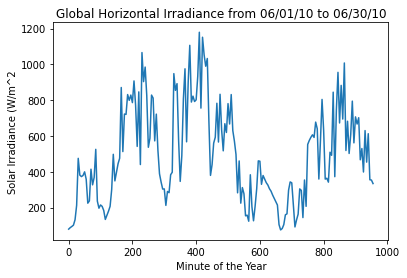

In [14]:
plt.plot(minutes, ghi_deleted)
plt.xlabel('Minute of the Year')
plt.ylabel('Solar Irradiance (W/m^2')
plt.title('Global Horizontal Irradiance from 06/01/10 to 06/30/10')

In [15]:
# make sure minutes is a  column vector (-1, 1)
# if you want a row vector, do (1, -1)
minutes = np.reshape(minutes, (-1, 1))

In [16]:
print(len(ghi_deleted))

192


# **Preparing the variables**

Here we will create the Desired matrix (D), the independent variable (x) and the test sets for both of them (D_test and x_test respectively)

**Preparing the Test Matrices**

In [17]:
# We want D to be 9 am to 5 pm (8 hours)
# ghi[i + 23] --> ghi[i + 96*days_wanted + 23]
# We add 23 because the ghi starts at 7:00 so 9:00 is going to be the 23rd index in GHI
# D Should be a column matrix of 96 datapoints per day
# 12 5-minute intervals per hour and 8 hours of samples a day
D = np.zeros((len(ghi_deleted), 1));

#print('Shape of D =', D.shape)
#print('Shape of GHI =', ghi.shape)
#print(ghi[96*days_wanted])
for i in range(23, (96*days_wanted + 23)):
   D[i-23] = ghi[(i)]
print(D.shape)
print('First value of D Matrix:', D[0])
print('9:00AM value of GHI:', ghi[23])
print('Last value of D Matrix:', D[191])
print('5:00PM value of GHI:', ghi[191+23])

(192, 1)
First value of D Matrix: [133.4622]
9:00AM value of GHI: [133.4622]
Last value of D Matrix: [720.9864]
5:00PM value of GHI: [720.9864]


In [18]:
# We want the x to be 8 am to 4 pm for 1 tap
x = np.zeros((len(ghi_deleted), 1))
x_test = np.zeros((len(ghi_deleted), 1))
for i in range(11, (96*days_wanted + 11)):
   x[i-11] = ghi[(i)]
x = np.reshape(x, (1, -1))
print(x.shape)
print('First value of x Matrix:', x[0,0])
print('8:00AM value of GHI:', ghi[11])
print('Last value of x Matrix:', x[0, 191])
print('4:00PM value of GHI:', ghi[191+11])

(1, 192)
First value of x Matrix: 358.01180000000005
8:00AM value of GHI: [358.0118]
Last value of x Matrix: 757.88
4:00PM value of GHI: [757.88]


**Preparing the test matrices**

The test matrices for D and x will be 2 days after and are created in the same manner

In [19]:
D_test = np.zeros((len(ghi_deleted), 1));
for i in range(23 + 96*days_wanted, (96*days_wanted*2 + 23)):
   D_test[i-(23 + 96*days_wanted)] = ghi[(i)]
print(D.shape)
print('First value of D Matrix:', D_test[0])
print('9:00AM value of GHI:', ghi[23 + 96*days_wanted])
print('Last value of D Matrix:', D_test[191])
print('5:00PM value of GHI:', ghi[96*2*days_wanted+22])


(192, 1)
First value of D Matrix: [938.569]
9:00AM value of GHI: [938.569]
Last value of D Matrix: [140.2562]
5:00PM value of GHI: [140.2562]


In [20]:
# We want the x to be 8 am to 4 pm for 1 tap
x_test = np.zeros((len(ghi_deleted), 1))
for i in range(11 + 96*days_wanted, (96*days_wanted*2 + 11)):
   x_test[i-(11 + 96*days_wanted)] = ghi[(i)]
x_test = np.reshape(x_test, (1, -1))
print(x.shape)
print('First value of x Matrix:', x_test[0,0])
print('8:00AM value of GHI:', ghi[11 + 96*days_wanted])
print('Last value of x Matrix:', x_test[0, 191])
print('4:00PM value of GHI:', ghi[96*days_wanted*2 + 10])

(1, 192)
First value of x Matrix: 621.843
8:00AM value of GHI: [621.843]
Last value of x Matrix: 273.14939999999996
4:00PM value of GHI: [273.1494]


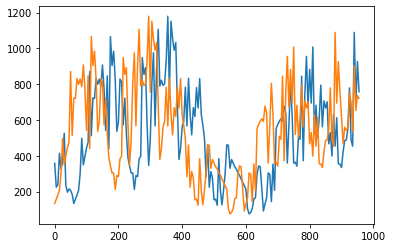

In [21]:
plt.plot(minutes, x.T)
plt.plot(minutes, D)

In [22]:
# First we have to make sure that the minutes matrix is a row matrix:
#x = np.reshape(minutes, (1, -1))
print('shape of x =', x.shape)
print(x)

shape of x = (1, 192)
[[ 358.0118   224.2558   237.1478   414.1566   326.8242   368.3486
   525.1864   235.777    196.2406   214.3592   206.5006   183.6988
   133.4622   156.77     179.681    206.8832   301.097    497.364
   348.7418   397.8814   444.9832   475.366    870.7926   512.597
   722.4124   720.4962   831.3384   799.1032   828.5152   786.296
   907.4564   771.9418   541.529    846.2612   440.1472  1066.0604
   903.601    984.9688   827.1184   536.652    587.4922   828.4546
   811.7192   572.3848   721.9718   520.7928   388.6226   342.6182
   303.2772   303.963    211.9462   289.8396   282.788    383.3424
   397.17     948.3096   854.8592   892.4052   573.5402   346.0428
   489.2308   807.8948   975.2886   567.1856   899.0448  1106.449
   789.3882   822.528    792.3592   801.8964   932.823   1179.568
   755.6004  1151.67    1053.3448   989.6768  1032.817    682.1952
   379.511    440.3372   560.0054   592.8018   782.7482   565.9618
   832.8592   632.536    516.8278   668.4336 

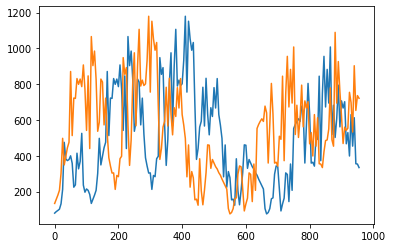

In [23]:
# At this point we should see a shifted (to the left version) of ghi because D
# starts at 9am while ghi starts at am
plt.plot(minutes, ghi_deleted)
plt.plot(minutes, D)

In [24]:
# Need to make sure that D is a column matrix of length m
D = np.reshape(D, (-1, 1))

In [25]:
print('shape of D =', D.shape)
print(D.shape)
print(D)

shape of D = (192, 1)
(192, 1)
[[ 133.4622 ]
 [ 156.77   ]
 [ 179.681  ]
 [ 206.8832 ]
 [ 301.097  ]
 [ 497.364  ]
 [ 348.7418 ]
 [ 397.8814 ]
 [ 444.9832 ]
 [ 475.366  ]
 [ 870.7926 ]
 [ 512.597  ]
 [ 722.4124 ]
 [ 720.4962 ]
 [ 831.3384 ]
 [ 799.1032 ]
 [ 828.5152 ]
 [ 786.296  ]
 [ 907.4564 ]
 [ 771.9418 ]
 [ 541.529  ]
 [ 846.2612 ]
 [ 440.1472 ]
 [1066.0604 ]
 [ 903.601  ]
 [ 984.9688 ]
 [ 827.1184 ]
 [ 536.652  ]
 [ 587.4922 ]
 [ 828.4546 ]
 [ 811.7192 ]
 [ 572.3848 ]
 [ 721.9718 ]
 [ 520.7928 ]
 [ 388.6226 ]
 [ 342.6182 ]
 [ 303.2772 ]
 [ 303.963  ]
 [ 211.9462 ]
 [ 289.8396 ]
 [ 282.788  ]
 [ 383.3424 ]
 [ 397.17   ]
 [ 948.3096 ]
 [ 854.8592 ]
 [ 892.4052 ]
 [ 573.5402 ]
 [ 346.0428 ]
 [ 489.2308 ]
 [ 807.8948 ]
 [ 975.2886 ]
 [ 567.1856 ]
 [ 899.0448 ]
 [1106.449  ]
 [ 789.3882 ]
 [ 822.528  ]
 [ 792.3592 ]
 [ 801.8964 ]
 [ 932.823  ]
 [1179.568  ]
 [ 755.6004 ]
 [1151.67   ]
 [1053.3448 ]
 [ 989.6768 ]
 [1032.817  ]
 [ 682.1952 ]
 [ 379.511  ]
 [ 440.3372 ]
 [ 560.0054 ]
 [ 

In [26]:
print(x.shape)
print(D.shape)

(1, 192)
(192, 1)


# **Regression**

Implementing the least-squares regression batch algorithm

In [27]:
#w = np.matmul(np.transpose(np.matmul(x.T, np.linalg.pinv(np.matmul(x, x.T)))), D)
# Least Squares Solution from Slide 11 set 5 of Dr. Kuh's slides:

w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(x, x.T)), x), D)
print('Shape of w is:', w.shape)
print(w)

Shape of w is: (1, 1)
[[0.87370791]]


In [28]:
y_pred = np.matmul(w.T, x)

In [29]:
print('Shape of y is:', y_pred.shape)
print(y_pred)

Shape of y is: (1, 192)
[[ 312.79774062  195.93406575  207.19790809  361.85189634  285.54888788
   321.82908452  458.85951056  206.00022929  171.45696398  187.28732807
   180.42120711  160.49909415  116.60697948  136.97118865  156.98871052
   180.75548776  263.07082981  434.55085968  304.69846832  347.6321254
   388.78534052  415.33103313  760.81838036  447.86005223  631.17742632
   629.50322722  726.34693384  698.1827847   723.88028168  686.99303279
   792.85183234  674.45165475  473.13816941  739.3851022   384.56008908
   931.42540129  789.48333887  860.57502914  722.65988647  468.87709595
   513.2965807   723.82733498  709.20548366  500.09712586  630.79247061
   455.0207875   339.54263863  299.34823057  264.97568779  265.57487667
   185.17907089  253.23515041  247.07411173  334.92928614  347.0105696
   828.54559622  746.89724279  779.70147988  501.10660798  302.34033067
   427.44481852  705.86407514  852.11736186  495.55454371  785.50255091
   966.71324048  689.69471238  718.6492176

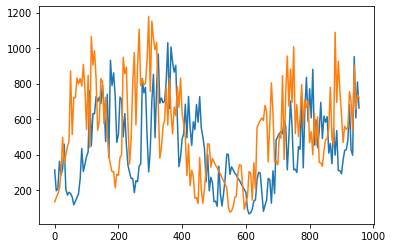

In [30]:
plt.plot(minutes, y_pred.T)
plt.plot(minutes, D)

# Adding Taps
Right now x is the D matrix but shifted back by an hour (or 12 indexes) and we want extra taps (added rows) that are just 5 minutes behind (or 1 index) of the row above it so the second tap will be from 7:55 - 8:55 and the third tap will be from 7:50-8:50 etc.

Lets make this part of the program create the taps AND plot each y_pred for each tap and then put the RMSE from each tap into a table

In [31]:
# Indicate the number of taps that we want to have
taps = 10

In [32]:
x = np.reshape(x, (-1, 1))
x_test = np.reshape(x_test, (-1, 1))
print(len(x))

192


In [33]:
#for i in range(11, (96*days_wanted + 11)):
#   x[i-11] = ghi[(i)]
# ^This is how we created the x vector before for just 1 tap
# So if we want to add m taps all we have to do is this for loop for each row m amount of times
# But every time we do it the for loop has to be 1 less index so simply 11-a where a is just
# the index of the for loop

In [34]:
# Create a temporary matrix that is going to be m x n where m represents the
# number of added rows or taps and n represents the amount of ghi values
temp = np.zeros((taps, len(x)));
# Now make sure temp is a row matrix that we can properly index
print('shape of temp matrix:', temp.shape)

shape of temp matrix: (10, 192)


In [35]:
for m in range(0, taps):
  for i in range((11 - m), (96*days_wanted + 11 - m)):
    temp[(m, i-11)] = ghi[i-m]
print('shape of temp matrix:', temp.shape)
print('shape of x matrix:', x.shape)
x = temp

shape of temp matrix: (10, 192)
shape of x matrix: (192, 1)


In [36]:
print(x)

[[ 358.0118   224.2558   237.1478  ...  693.8564   926.321    757.88   ]
 [ 399.4198   358.0118   224.2558  ... 1089.489    693.8564   379.005  ]
 [ 379.005    399.4198   358.0118  ...  453.3618   381.1854   372.8568 ]
 ...
 [ 131.6458   212.2546   474.894   ...   87.77624   94.18934  101.49408]
 [ 101.49408  131.6458   212.2546  ...   79.256     87.77624   94.18934]
 [  94.18934  101.49408  131.6458  ...    0.        79.256     87.77624]]


In [37]:
print(np.shape((x[0:2, :])))

(2, 192)


** Now we need to add taps for the test matrix for x**

In [38]:
print(len(x_test))

192


In [39]:
temp2 = np.zeros((taps, len(x_test)));
for m in range(0, taps):
  for i in range((11 + 96*days_wanted - m), (96*days_wanted*2 + 11 - m)):
    temp2[(m, i-(11 + 96*days_wanted))] = ghi[i-m]
print('shape of temp matrix:', temp2.shape)
print('shape of x_test matrix:', x_test.shape)
x_test = temp2

shape of temp matrix: (10, 192)
shape of x_test matrix: (192, 1)


In [40]:
print(x_test)

[[ 621.843   468.3444  559.7306 ...  326.2704  303.1728  273.1494]
 [ 757.88    621.843   468.3444 ...  322.8238  326.2704  926.321 ]
 [ 926.321   757.88    621.843  ...  343.679  1089.489   693.8564]
 ...
 [ 779.1128  488.5146  453.3618 ...  484.8252  488.2548  549.0078]
 [ 549.0078  779.1128  488.5146 ...  422.2042  484.8252  488.2548]
 [ 488.2548  549.0078  779.1128 ...  333.8842  422.2042  484.8252]]


In [41]:
print(x_test.shape)

(10, 192)


Shape of RMSE is (1, 10)
RMSE mat: [[41.140552  0.        0.        0.        0.        0.        0.
   0.        0.        0.      ]]
At tap # 1 ,w =
[[0.87370791]]
Shape of RMSE is (1, 10)
RMSE mat: [[41.140552   38.10448845  0.          0.          0.          0.
   0.          0.          0.          0.        ]]
At tap # 2 ,w =
[[0.45336647]
 [0.44836538]]
Shape of RMSE is (1, 10)
RMSE mat: [[41.140552   38.10448845 37.012689    0.          0.          0.
   0.          0.          0.          0.        ]]
At tap # 3 ,w =
[[0.35803544]
 [0.30167209]
 [0.25376705]]
Shape of RMSE is (1, 10)
RMSE mat: [[41.140552   38.10448845 37.012689   36.30193457  0.          0.
   0.          0.          0.          0.        ]]
At tap # 4 ,w =
[[0.33803278]
 [0.24559654]
 [0.14194596]
 [0.19467813]]
Shape of RMSE is (1, 10)
RMSE mat: [[41.140552   38.10448845 37.012689   36.30193457 35.84984348  0.
   0.          0.          0.          0.        ]]
At tap # 5 ,w =
[[0.33602906]
 [0.24183383]
 

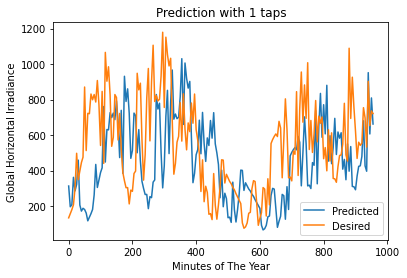

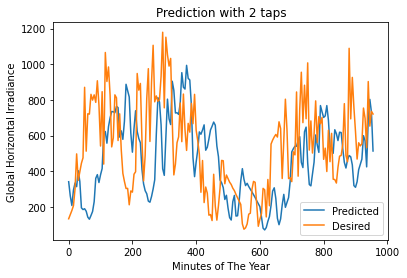

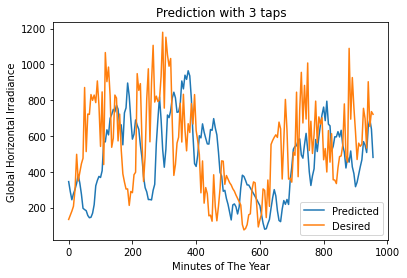

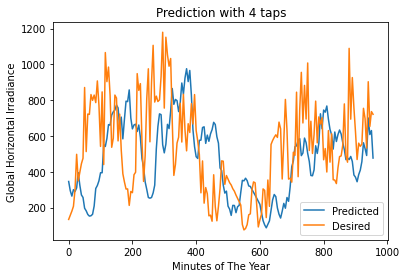

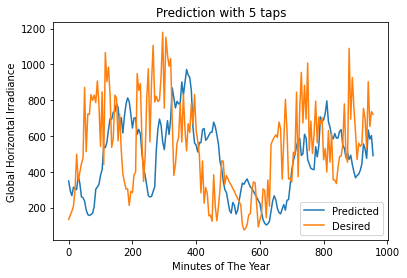

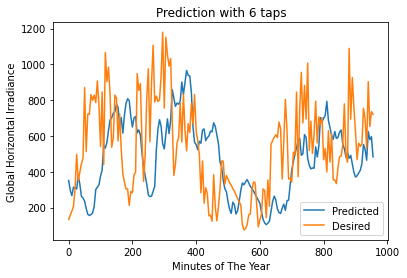

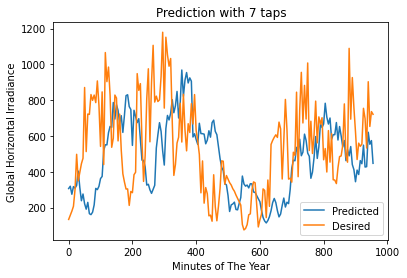

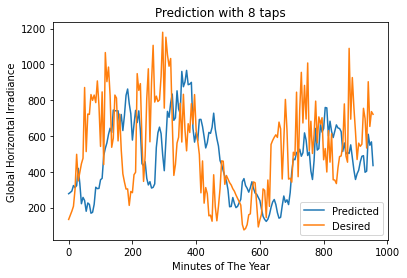

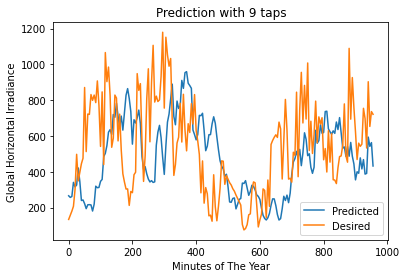

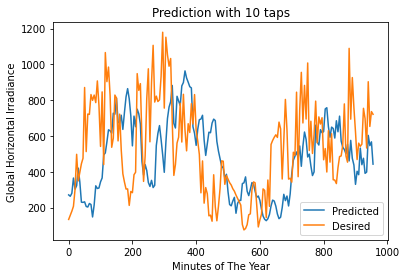

In [42]:
# Now in this next loop I want to calculate w for each tap then calculate y for each tap and add to a plot
# Since both w and y are just going to be single column vectors of size m where m equals the number of taps
# what we can do is add columns to w and y and make the extra columns contain the tapped calculations

# Create a temp matrix for w that will be m x m
# For the first column w should have 1 value, for the second column it should have 2, etc etc
# So we just need to add zeros to fill the spaces for w
# When doing the y calculation we have to make sure that we are indexing only the values we want

temp_wTaps = [];
temp_wAllTaps = [];
error = np.zeros((len(D), len(D)));
RMSE = np.zeros((1, taps));
for i in range(0, taps):
  for j in range(0, i+1):
    w_ithTap = np.matmul(np.matmul(np.linalg.pinv(np.matmul(x[0:(j+1), :], np.transpose(x[0:(j+1), :]))), x[0:(j+1), :]), D)
    y_ithTap = np.matmul(w_ithTap.T, x[0:(j+1), :])
  error[:, i] = D.T - y_ithTap
  RMSE[0, i] = np.sqrt(np.sum(error[:, i])/taps)
  print('Shape of RMSE is', RMSE.shape)
  print('RMSE mat:', RMSE)
  plt.figure()
  plt.plot(minutes, y_ithTap.T)
  plt.plot(minutes, D)
  title_string = ('Prediction with %d taps' % ((i+1)))
  plt.title(title_string)
  plt.xlabel('Minutes of The Year')
  plt.ylabel('Global Horizontal Irradiance')
  plt.legend(['Predicted', 'Desired'])
  print('At tap #', i+1, ',w =')
  print(w_ithTap)

Plotting Error vs. Taps

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'RMSE')

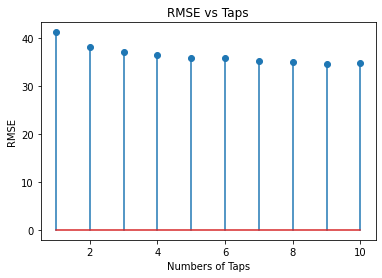

In [43]:
num_taps = np.array(range(1,taps+1));  # Making mat for number of taps (x-axis)
num_taps = np.reshape(num_taps, (1, -1))
plt.stem(num_taps.T, RMSE.T)
plt.title('RMSE vs Taps')
plt.xlabel('Numbers of Taps')
plt.ylabel('RMSE')

# **Decision Tree Regression**

Using the Sci Kit Learn Library to make predictions using the Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', random_state = 0)
DTregressor.fit(x.T, D)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [45]:
y_DT = DTregressor.predict(x.T)

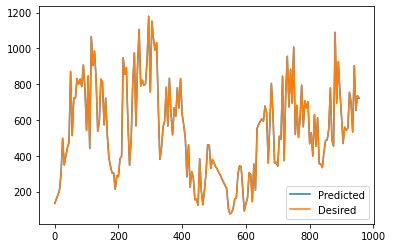

In [46]:
  plt.plot(minutes, y_DT)
  plt.plot(minutes, D)
  plt.legend(['Predicted', 'Desired'])

# **Simple Linear Regression**
Implementing Simple Linear Regression (Which uses Least Squares Regression) from the Sci-Kit Learn Library

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
Simpleregressor = LinearRegression()
x_scaler = StandardScaler()
y_scaler = StandardScaler()
D_train = D
D_train_norm = y_scaler.fit_transform(D_train)
D_test_norm = y_scaler.transform(D_test)

In [48]:
print(x_test.shape)

(10, 192)


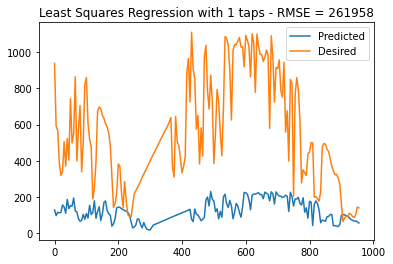

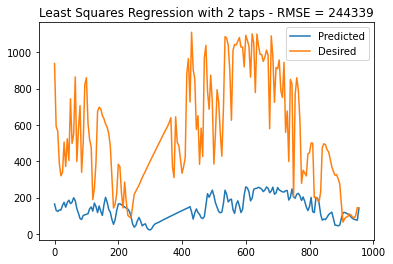

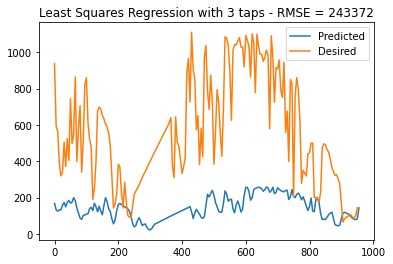

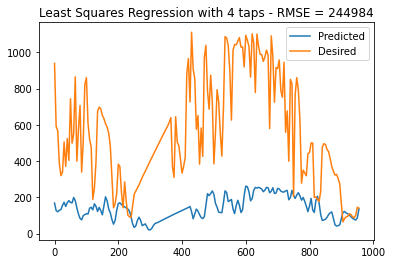

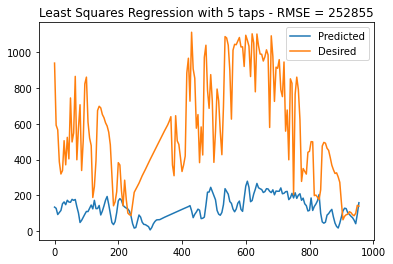

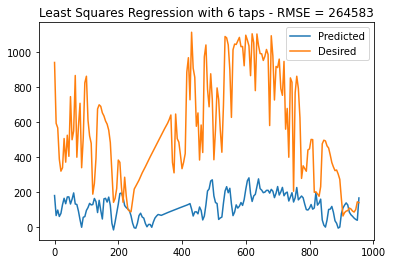

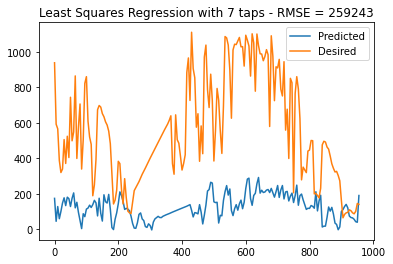

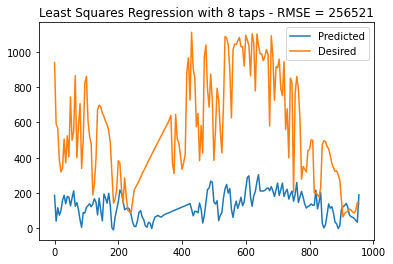

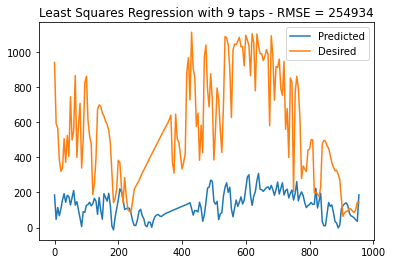

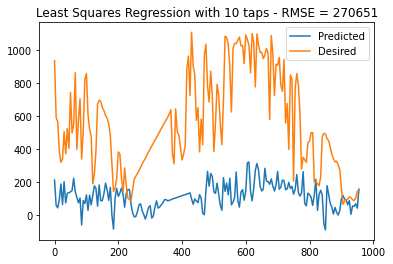

In [49]:
# Let's create a for loop that will plot all of the taps for simple linear regression: 
from sklearn.metrics import mean_squared_error
RMSE_simple = np.zeros((taps, 1))
for i in range(0, taps):
    x_train_norm = x_scaler.fit_transform(np.transpose(x[0:i+1, :]))
    x_test_norm = x_scaler.transform(np.transpose(x_test[0:i+1, :]))
    Simpleregressor.fit(x_train_norm, D_train_norm)
    y_simple = Simpleregressor.predict((x_scaler.inverse_transform(x_test_norm)))
    #y_simple = y_scaler.inverse_transform(y_simple)
    RMSE_simple[i] = mean_squared_error(D_test, (y_simple))
    title_string = 'Least Squares Regression with %d taps - RMSE = %d' % ((i + 1), RMSE_simple[i])
    plt.figure()
    plt.plot(minutes, (y_simple))
    plt.plot(minutes, (D_test))
    plt.title(title_string)
    plt.legend(['Predicted', 'Desired'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'RMSE')

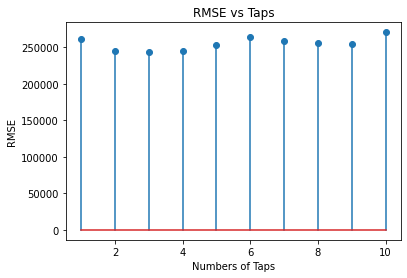

In [50]:
plt.stem(num_taps.T, RMSE_simple)
plt.title('RMSE vs Taps')
plt.xlabel('Numbers of Taps')
plt.ylabel('RMSE')

In [51]:
y_simple = Simpleregressor.predict(x.T)

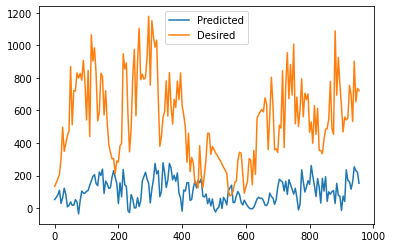

In [52]:
  plt.plot(minutes, y_simple)
  plt.plot(minutes, D)
  plt.legend(['Predicted', 'Desired'])

In [53]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
#print(accuracy_score(D, y_simple))
#print(r2_score(D, y_simple))
print(mean_squared_error(D, y_simple))

254990.97339165062


# **SKLearn - SVR**

In [54]:
#print(x.shape)

In [55]:
#x = x.T
#x = np.reshape(x, (-1, 1))

In [56]:
#x_norm = (x - np.mean(x))/np.std(x)
#D_norm = (D - np.mean(D))/np.std(D)

In [57]:
#print(x_norm.shape)

In [58]:
#from sklearn.svm import SVR
#regressor = SVR(kernel = 'rbf')
#regressor.fit(x_norm, D_norm)
#y_norm = regressor.predict(x_norm)
#y = y_norm * np.std(D) + np.mean(D)
#plt.plot(minutes, D)
#plt.plot(minutes, y)

In [59]:
#y = np.reshape(y, (-1, 1))
#print(y.shape)
#print(D.shape)

In [60]:
#error = np.zeros((len(D), 1));
#print('shape of error:', error.shape)
#for i in range(0, len(D)):
#  error[(i, 0)] = (y[(i, 0)] - D[(i, 0)])**2; #(Y(i)-D(i))^2
#rmse = np.sqrt((np.sum(error) / len(D)))
#print('RMSE =', rmse)